<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Imports</h2>
</div>


In [1]:
%pip install --upgrade pip
%pip uninstall -y numpy pandas scipy
%pip install numpy==1.21.0 pandas==1.3.0 scipy==1.7.0
%pip install --upgrade matplotlib seaborn opencv-python-headless tensorflow tqdm prettytable ipywidgets pillow scikit-learn splitfolders
%pip install opencv-python-headless
%pip install tensorflow
%pip install tqdm
%pip install scikit-learn


Found existing installation: numpy 1.26.4Note: you may need to restart the kernel to use updated packages.

Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: scipy 1.14.0
Uninstalling scipy-1.14.0:
  Successfully uninstalled scipy-1.14.0


In [ ]:
%pip install pandas numpy matplotlib seaborn opencv-python-headless tensorflow tqdm scikit-learn prettytable ipywidgets pillow



  Using cached pandas-2.2.2-cp310-cp310-win_amd64.whl.metadata (19 kB)
Using cached pandas-2.2.2-cp310-cp310-win_amd64.whl (11.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
# For ML Models
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.applications import EfficientNetV2B3
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
import splitfolders
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from prettytable import PrettyTable
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Seed</h2>
</div>


In [ ]:
tf.random.set_seed(42)
# np.rando.set_seed(42)

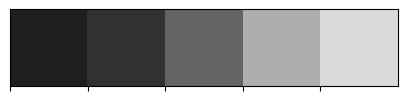

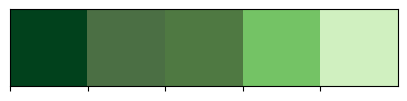

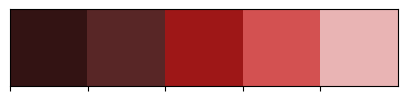

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Data Import and split 80-20</h2>
</div>


In [ ]:
labels = ['glioma','notumor','meningioma','pituitary']

In [ ]:
TRAIN_DIR = r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\StrategicThinkingCA3-\\MedicalImages\\Training'
splitfolders.ratio(TRAIN_DIR, output="DataSplit", ratio=(0.8, 0.2))

Copying files: 5712 files [00:16, 353.05 files/s]


In [ ]:
X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\\StrategicThinkingCA3-\\DataSplit\\','x_train80%',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
  
 
    
X_val = []
y_val = []
for i in labels:
    folderPath = os.path.join(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\\StrategicThinkingCA3-\\DataSplit\\','y_train20%',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_val.append(img)
        y_val.append(i)
        

X_test = []
y_test = []
        
for i in labels:
    folderPath = os.path.join(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\\StrategicThinkingCA3-\\MedicalImages\\','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_test.append(img)
        y_test.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

100%|██████████| 300/300 [00:00<00:00, 326.35it/s]


In [ ]:
print('Training 80%')
print(X_train.shape)
print('Training 20%')
print(X_val.shape)
print('Test')
print(X_test.shape)

Training 80%
(4568, 150, 150, 3)
Training 20%
(1144, 150, 150, 3)
Test
(1311, 150, 150, 3)


<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Show train data in charts</h2>
</div>

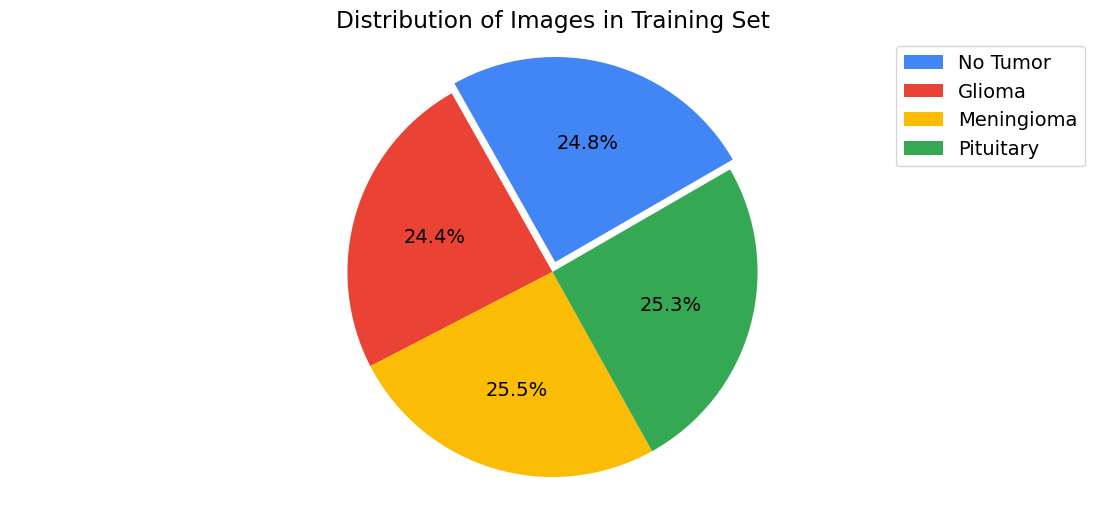

In [ ]:
# Get the number of images for each label from the Counter dictionaries
notumor_count = len(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\\StrategicThinkingCA3-\\DataSplit\\x_train80%\\notumor')
glioma_count = len(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\StrategicThinkingCA3-\\DataSplit\\x_train80%\\glioma')
meningioma_count = len(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\\StrategicThinkingCA3-\\DataSplit\\x_train80%\\meningioma')
pituitary_count = len(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\\StrategicThinkingCA3-\\DataSplit\\x_train80%\\pituitary')

# Create a list of numerical values that represent the number of images for each label
sizes = [notumor_count, glioma_count, meningioma_count, pituitary_count]

# Set up the plot
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie(sizes, colors=colors, autopct='%.1f%%', explode=(0.05,0,0,0),
        startangle=30);

# Add labels to the plot
labels = ['No Tumor', 'Glioma', 'Meningioma', 'Pituitary']
plt.legend(labels, loc='best')
plt.axis('equal')
plt.title('Distribution of Images in Training Set')
plt.show()


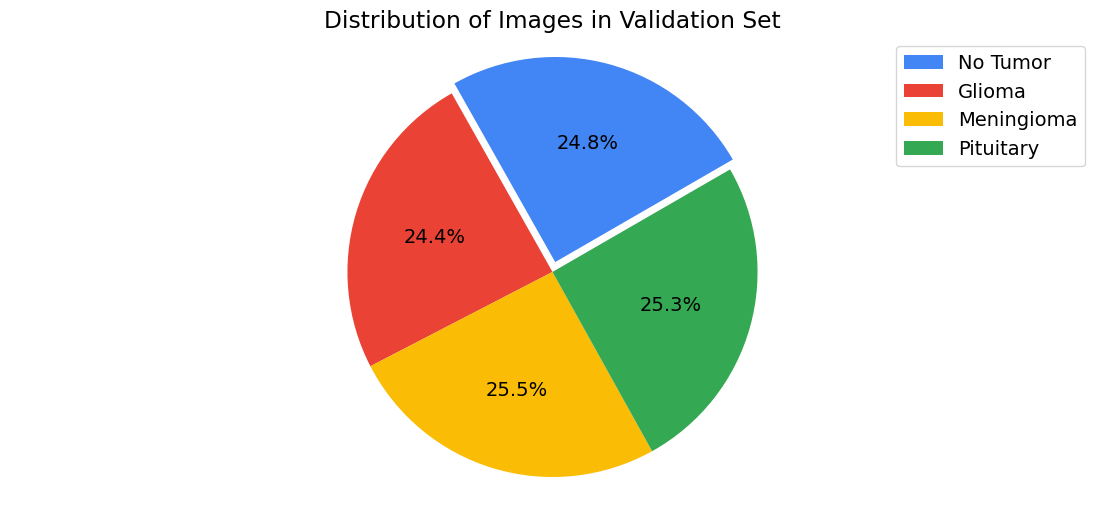

In [ ]:
# Get the number of images for each label from the Counter dictionaries
notumor_count = len(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\\StrategicThinkingCA3-\\DataSplit\\y_train20%\\notumor')
glioma_count = len(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\StrategicThinkingCA3-\\DataSplit\\y_train20%\\glioma')
meningioma_count = len(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\\StrategicThinkingCA3-\\DataSplit\\y_train20%\\meningioma')
pituitary_count = len(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\\StrategicThinkingCA3-\\DataSplit\\y_train20%\\pituitary')

# Create a list of numerical values that represent the number of images for each label
sizes = [notumor_count, glioma_count, meningioma_count, pituitary_count]

# Set up the plot
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie(sizes, colors=colors, autopct='%.1f%%', explode=(0.05,0,0,0),
        startangle=30);

# Add labels to the plot
labels = ['No Tumor', 'Glioma', 'Meningioma', 'Pituitary']
plt.legend(labels, loc='best')
plt.axis('equal')
plt.title('Distribution of Images in Validation Set')
plt.show()

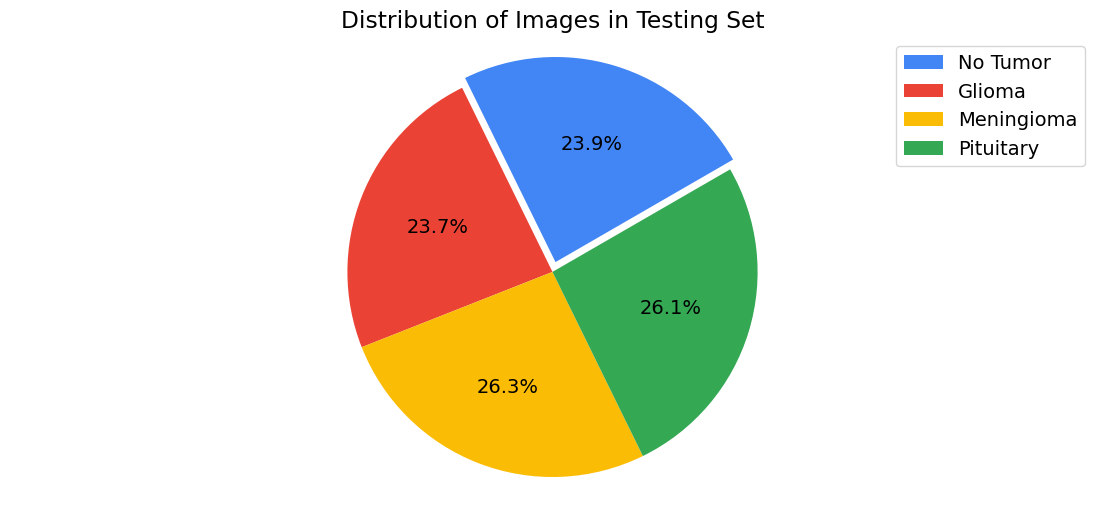

In [ ]:
# Get the number of images for each label from the Counter dictionaries
notumor_count = len(r'C:\Users\eduma\OneDrive\Escritorio\CA3\StrategicThinkingCA3-\\MedicalImages\Testing\\notumor')
glioma_count = len(r'C:\Users\eduma\OneDrive\Escritorio\CA3\StrategicThinkingCA3-\\MedicalImages\Testing\\glioma')
meningioma_count = len(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\\StrategicThinkingCA3-\\MedicalImages\\Testing\\meningioma')
pituitary_count = len(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\\StrategicThinkingCA3-\\\MedicalImages\\Testing\\pituitary')

# Create a list of numerical values that represent the number of images for each label
sizes = [notumor_count, glioma_count, meningioma_count, pituitary_count]

# Set up the plot
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie(sizes, colors=colors, autopct='%.1f%%', explode=(0.05,0,0,0),
        startangle=30);

# Add labels to the plot
labels = ['No Tumor', 'Glioma', 'Meningioma', 'Pituitary']
plt.legend(labels, loc='best')
plt.axis('equal')
plt.title('Distribution of Images in Testing Set')
plt.show()

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">One-Hot Encoding</h2>
</div>


In [ ]:
y_train_new = []
for i in y_train:
 y_train_new.append(labels.index(i))

y_train = tf.keras.utils.to_categorical(y_train_new)
y_val_new = []
for i in y_val:
 y_val_new.append(labels.index(i))
y_val = tf.keras.utils.to_categorical(y_val_new)
y_test_new = []
for i in y_test:
 y_test_new.append(labels.index(i))
y_test = tf.keras.utils.to_categorical(y_test_new)


ValueError: 'glioma' is not in list

In [ ]:

# Scaling Train, Valid and Test Features
X_train_scaled = X_train.astype('float32')
X_val_scaled = X_val.astype('float32')
X_test_scaled = X_test.astype('float32')
X_train_scaled /= 255.
X_val_scaled /= 255.
X_test_scaled /= 255.


In [ ]:
minvalue = np.min(X_train)
maxvalue = np.max(X_train)
minvalues = np.min(X_train_scaled)
maxvalues = np.max(X_train_scaled)
print(minvalue)
print(maxvalue)
print(minvalues)
print(maxvalues)

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Generic values</h2>
</div>


In [ ]:
batch_size = 32              # Batch size for training and validation
num_classes = 4             # Number of classes in the dataset

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True)


<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">ResNet50</h2>
</div>


In [ ]:
# Loading the pre-trained ResNet50 model without the top classification layer
res_model = ResNet50(weights='imagenet', input_shape=(image_size, image_size, 3), include_top=False)

# Freezing the layers of the pre-trained model
for layer in res_model.layers:
    layer.trainable = False

# Building the new model
model = Sequential()
model.add(res_model)
model.add(Flatten())
model.add(Dense(4, activation='softmax'))  # 4 classes in the output layer

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [ ]:
# Defining the checkpoint
filepath = "weightsbestTesNet50100%scaled.keras"  # Updated extension
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


In [ ]:
historyres = model.fit(datagen.flow(X_train_scaled, y_train, batch_size=32),
validation_data=(X_val_scaled, y_val),
batch_size=32,
epochs=20,
callbacks=callbacks_list)


Epoch 1/20


c:\Users\eduma\OneDrive\Escritorio\CA3\test\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.5335 - loss: 1.1844
Epoch 1: val_categorical_accuracy improved from -inf to 0.73864, saving model to weightsbestTesNet50100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 284s 2s/step - categorical_accuracy: 0.5341 - loss: 1.1826 - val_categorical_accuracy: 0.7386 - val_loss: 0.6655
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.7212 - loss: 0.7114
Epoch 2: val_categorical_accuracy improved from 0.73864 to 0.74563, saving model to weightsbestTesNet50100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - categorical_accuracy: 0.7212 - loss: 0.7112 - val_categorical_accuracy: 0.7456 - val_loss: 0.6126
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 977ms/step - categorical_accuracy: 0.7546 - loss: 0.6088
Epoch 3: val_categorical_accuracy improved from 0.74563 to 0.80420, saving model to weightsbestTesNet50100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - categorical_accuracy: 0.7546 - l

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">VGG16</h2>
</div>


In [ ]:
# Loading the pre-trained VGG16 model without the top classification layer
v = VGG16(weights='imagenet', input_shape=(image_size, image_size, 3), include_top=False)

# Freezing the layers of the pre-trained model
for layer in v.layers:
    layer.trainable = False

# Building the new model
model = Sequential()
model.add(v)
model.add(Flatten())
model.add(Dense(4, activation='softmax'))  # 4 classes in the output layer

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# Defining the checkpoint
filepath = "weightsbestVGG16100%scaled.keras"  # Updated extension
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

# Fitting the model
historyVGG16 = model.fit(
    datagen.flow(X_train_scaled, y_train, batch_size=32),
    validation_data=(X_val_scaled, y_val),
    epochs=20,
    callbacks=callbacks_list
)


Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.6640 - loss: 0.8278
Epoch 1: val_categorical_accuracy improved from -inf to 0.86888, saving model to weightsbestVGG16100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 289s 2s/step - categorical_accuracy: 0.6647 - loss: 0.8262 - val_categorical_accuracy: 0.8689 - val_loss: 0.3884
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.8572 - loss: 0.4084
Epoch 2: val_categorical_accuracy improved from 0.86888 to 0.87675, saving model to weightsbestVGG16100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 292s 2s/step - categorical_accuracy: 0.8573 - loss: 0.4082 - val_categorical_accuracy: 0.8767 - val_loss: 0.3351
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.8834 - loss: 0.3148
Epoch 3: val_categorical_accuracy improved from 0.87675 to 0.89423, saving model to weightsbestVGG16100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - categorical_accuracy: 0.8834 - lo

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">ResNet50 V2</h2>
</div>

In [ ]:

rsv2 = ResNet50V2(weights='imagenet', input_shape=(image_size, image_size, 3), include_top=False)
for layer in rsv2.layers:
    layer.trainable = False

modelrsv2 = Sequential()
modelrsv2.add(rsv2)
modelrsv2.add(Flatten())
modelrsv2.add(Dense(4, activation='softmax'))

modelrsv2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# checkpoint
filepath = "weightsbestResNet50V2100%scaled.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

historyrsv2 = modelrsv2.fit(
    datagen.flow(X_train_scaled, y_train, batch_size=32),
    validation_data=(X_val_scaled, y_val),
    batch_size=32,
    epochs=20,
    callbacks=callbacks_list
)


Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 903ms/step - categorical_accuracy: 0.7054 - loss: 3.3761
Epoch 1: val_categorical_accuracy improved from -inf to 0.83042, saving model to weightsbestResNet50V2100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step - categorical_accuracy: 0.7061 - loss: 3.3667 - val_categorical_accuracy: 0.8304 - val_loss: 1.7425
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 932ms/step - categorical_accuracy: 0.8701 - loss: 1.1422
Epoch 2: val_categorical_accuracy improved from 0.83042 to 0.86976, saving model to weightsbestResNet50V2100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - categorical_accuracy: 0.8701 - loss: 1.1424 - val_categorical_accuracy: 0.8698 - val_loss: 1.5125
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 903ms/step - categorical_accuracy: 0.8775 - loss: 1.2680
Epoch 3: val_categorical_accuracy improved from 0.86976 to 0.87150, saving model to weightsbestResNet50V2100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - categoric

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">ENV2B0</h2>
</div>

In [ ]:
# DefinING the model
env2b0 = EfficientNetV2B0(weights='imagenet', input_shape=(image_size, image_size, 3), include_top=False, include_preprocessing=False)
for layer in env2b0.layers:
    layer.trainable = False

modelenv2b0 = Sequential()
modelenv2b0.add(env2b0)
modelenv2b0.add(Flatten())
modelenv2b0.add(Dense(4, activation='softmax'))

modelenv2b0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# Checkpoint
filepath = "weightsbestENV2B0100%scaled.keras"  # .keras extension
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fitting the model
historyenv2b0 = modelenv2b0.fit(
    datagen.flow(X_train_scaled, y_train, batch_size=32),
    validation_data=(X_val_scaled, y_val),
    batch_size=32,
    epochs=20,
    callbacks=callbacks_list
)

Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 725ms/step - categorical_accuracy: 0.6967 - loss: 1.2598
Epoch 1: val_categorical_accuracy improved from -inf to 0.90385, saving model to weightsbestENV2B0100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - categorical_accuracy: 0.6973 - loss: 1.2569 - val_categorical_accuracy: 0.9038 - val_loss: 0.3919
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 672ms/step - categorical_accuracy: 0.8469 - loss: 0.5223
Epoch 2: val_categorical_accuracy improved from 0.90385 to 0.90734, saving model to weightsbestENV2B0100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 122s 830ms/step - categorical_accuracy: 0.8470 - loss: 0.5221 - val_categorical_accuracy: 0.9073 - val_loss: 0.3017
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 743ms/step - categorical_accuracy: 0.8987 - loss: 0.3778
Epoch 3: val_categorical_accuracy improved from 0.90734 to 0.91434, saving model to weightsbestENV2B0100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 132s 910ms/step - categorical_acc

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Personalized</h2>
</div>

In [ ]:
modelP = Sequential()
modelP.add(Flatten(input_shape=(image_size, image_size, 3)))
modelP.add(Dense(4, activation='softmax'))

modelP.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# Define the name of the file for saving the models
filepath = "weightsbestPersonal100%scaled.keras"  # Changed to .keras extension

# Set up ModelCheckpoint
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Train the model
historyPers = modelP.fit(
    datagen.flow(X_train_scaled, y_train, batch_size=32),
    validation_data=(X_val_scaled, y_val),
    batch_size=32,
    epochs=20,
    callbacks=callbacks_list
)

c:\Users\eduma\OneDrive\Escritorio\CA3\test\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - categorical_accuracy: 0.3872 - loss: 2.9280
Epoch 1: val_categorical_accuracy improved from -inf to 0.45717, saving model to weightsbestPersonal100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 37s 237ms/step - categorical_accuracy: 0.3874 - loss: 2.9228 - val_categorical_accuracy: 0.4572 - val_loss: 1.4807
Epoch 2/20
142/143 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - categorical_accuracy: 0.4499 - loss: 1.7687
Epoch 2: val_categorical_accuracy improved from 0.45717 to 0.53409, saving model to weightsbestPersonal100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 30s 198ms/step - categorical_accuracy: 0.4498 - loss: 1.7727 - val_categorical_accuracy: 0.5341 - val_loss: 1.5642
Epoch 3/20
141/143 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - categorical_accuracy: 0.4246 - loss: 2.1247
Epoch 3: val_categorical_accuracy improved from 0.53409 to 0.57780, saving model to weightsbestPersonal100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 31s 203ms/step - categoric

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Predictions</h2>
</div>

In [ ]:

modelpred1 = load_model('weightsbestTesNet50100%scaled.keras')

modelpred2 = load_model('weightsbestVGG16100%scaled.keras')

modelpred3 = load_model('weightsbestResNet50V2100%scaled.keras')

modelpred4 = load_model('weightsbestENV2B0100%scaled.keras')

modelpred5 = load_model('weightsbestPersonal100%scaled.keras')


In [ ]:
# Obtening Original labels for testing
y_true = np.argmax(y_test,axis=1)

# Labels de TesNet50100
y_pred1 = modelpred1.predict(X_test_scaled)
y_pred1 = np.argmax(y_pred1,axis=1)
# Labels de VGG16100
y_pred2 = modelpred2.predict(X_test_scaled)
y_pred2 = np.argmax(y_pred2,axis=1)
# Labels de ResNet50V2100
y_pred3 = modelpred3.predict(X_test_scaled)
y_pred3 = np.argmax(y_pred3,axis=1)
# Labels de ENV2B0100
y_pred4 = modelpred4.predict(X_test_scaled)
y_pred4 = np.argmax(y_pred4,axis=1)
# Labels de Personal
y_pred5 = modelpred5.predict(X_test_scaled)
y_pred5= np.argmax(y_pred5,axis=1)


41/41 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 408ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


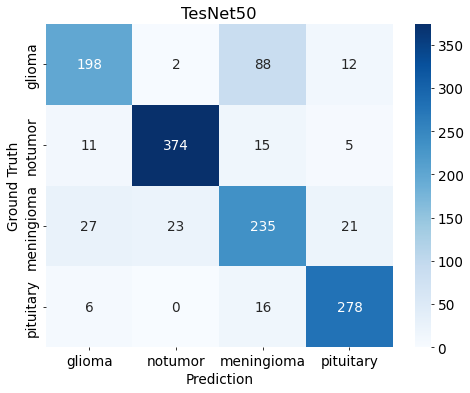

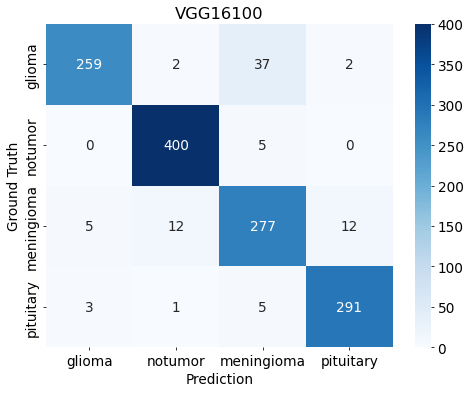

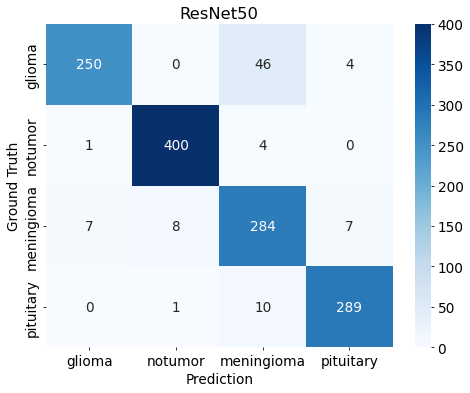

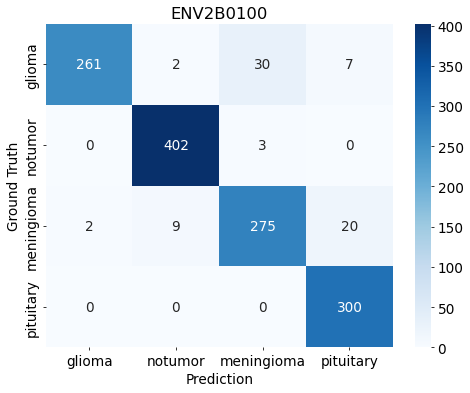

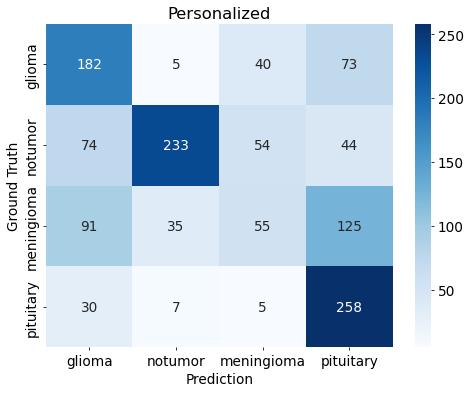

In [ ]:

cnf = confusion_matrix(y_true, y_pred1)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('TesNet50')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)
cnf = confusion_matrix(y_true, y_pred2)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('VGG16100')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)
cnf = confusion_matrix(y_true, y_pred3)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('ResNet50')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)
cnf = confusion_matrix(y_true, y_pred4)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('ENV2B0100')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)
cnf = confusion_matrix(y_true, y_pred5)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('Personalized')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

In [ ]:
print('TesNet50' + classification_report(y_true, y_pred1))
print('-------------------------------------------------------------------------')
print('VGG16100' + classification_report(y_true, y_pred2))
print('-------------------------------------------------------------------------')
print('ResNet50' + classification_report(y_true, y_pred3))
print('-------------------------------------------------------------------------')
print('ENV2B' + classification_report(y_true, y_pred4))
print('-------------------------------------------------------------------------')
print('Personalized' + classification_report(y_true, y_pred5))
print('--------------------------------------------------')

TesNet50              precision    recall  f1-score   support

           0       0.82      0.66      0.73       300
           1       0.94      0.92      0.93       405
           2       0.66      0.77      0.71       306
           3       0.88      0.93      0.90       300

    accuracy                           0.83      1311
   macro avg       0.82      0.82      0.82      1311
weighted avg       0.83      0.83      0.83      1311

-------------------------------------------------------------------------
VGG16100              precision    recall  f1-score   support

           0       0.97      0.86      0.91       300
           1       0.96      0.99      0.98       405
           2       0.85      0.91      0.88       306
           3       0.95      0.97      0.96       300

    accuracy                           0.94      1311
   macro avg       0.94      0.93      0.93      1311
weighted avg       0.94      0.94      0.94      1311

----------------------------------------

In [ ]:
# Columnas de la tabla
t = PrettyTable(['Model', 'Accuracy', 'glioma','meningioma', 'notumor', 'pituitary'])
# To insert rows:
t.add_row(['TesNet50', 0.83,0.82,0.94,0.66,0.88])
t.add_row(['VGG16100', 0.94,0.97,0.96,0.85,0.95 ])
t.add_row(['ResNet50', 0.94,0.97,0.98,0.83,0.96])
t.add_row(['ENV2B', 0.95,0.99,0.97,0.89,0.92])
t.add_row(['Personalized', 0.57,0.48,0.83,0.36,0.52 ])
print(t)


+--------------+----------+--------+------------+---------+-----------+
|    Model     | Accuracy | glioma | meningioma | notumor | pituitary |
+--------------+----------+--------+------------+---------+-----------+
|   TesNet50   |   0.83   |  0.82  |    0.94    |   0.66  |    0.88   |
|   VGG16100   |   0.94   |  0.97  |    0.96    |   0.85  |    0.95   |
|   ResNet50   |   0.94   |  0.97  |    0.98    |   0.83  |    0.96   |
|    ENV2B     |   0.95   |  0.99  |    0.97    |   0.89  |    0.92   |
| Personalized |   0.57   |  0.48  |    0.83    |   0.36  |    0.52   |
+--------------+----------+--------+------------+---------+-----------+


<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Data Import and split 70-30</h2>
</div>

In [ ]:
TRAIN_DIR = r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\StrategicThinkingCA3-\\StrategicThinkingCA3\\MedicalImages\\Training'
splitfolders.ratio(TRAIN_DIR, output="DataSplit", ratio=(0.7, 0.3))

Copying files: 5712 files [00:22, 254.12 files/s]


In [ ]:
X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\\StrategicThinkingCA3-\\DataSplit\\','x_train70%',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
  
 
    
X_val = []
y_val = []
for i in labels:
    folderPath = os.path.join(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\\StrategicThinkingCA3-\\DataSplit\\','y_train30%',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_val.append(img)
        y_val.append(i)
        

X_test = []
y_test = []
        
for i in labels:
    folderPath = os.path.join(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\\StrategicThinkingCA3-\\MedicalImages\\','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_test.append(img)
        y_test.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\\\Users\\\\eduma\\\\OneDrive\\\\Escritorio\\\\CA3\\\\StrategicThinkingCA3-\\\\StrategicThinkingCA3\\\\DataSplit\\\\x_train70%\\No Tumor'

In [ ]:
print('Training 70%')
print(X_train.shape)
print('Training 30%')
print(X_val.shape)
print('Test')
print(X_test.shape)

Training 70%
(4568, 150, 150, 3)
Training 30%
(1144, 150, 150, 3)
Test
(1311, 150, 150, 3)


<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">One-Hot Encoding</h2>
</div>

In [ ]:
y_train_new = []
for i in y_train:
 y_train_new.append(labels.index(i))

y_train = tf.keras.utils.to_categorical(y_train_new)
y_val_new = []
for i in y_val:
 y_val_new.append(labels.index(i))
y_val = tf.keras.utils.to_categorical(y_val_new)
y_test_new = []
for i in y_test:
 y_test_new.append(labels.index(i))
y_test = tf.keras.utils.to_categorical(y_test_new)

In [ ]:
# Scaling Train, Valid and Test Features
X_train_scaled = X_train.astype('float32')
X_val_scaled = X_val.astype('float32')
X_test_scaled = X_test.astype('float32')
X_train_scaled /= 255.
X_val_scaled /= 255.
X_test_scaled /= 255.

In [ ]:
minvalue = np.min(X_train)
maxvalue = np.max(X_train)
minvalues = np.min(X_train_scaled)
maxvalues = np.max(X_train_scaled)
print(minvalue)
print(maxvalue)
print(minvalues)
print(maxvalues)

0
255
0.0
1.0


<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">ResNet50</h2>
</div>


In [ ]:
# Loading the pre-trained ResNet50 model without the top classification layer
res_model = ResNet50(weights='imagenet', input_shape=(image_size, image_size, 3), include_top=False)

# Freezing the layers of the pre-trained model
for layer in res_model.layers:
    layer.trainable = False

# Building the new model
model = Sequential()
model.add(res_model)
model.add(Flatten())
model.add(Dense(4, activation='softmax'))  # 4 classes in the output layer

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [ ]:
# Defining the checkpoint
filepath = "weightsbestTesNet50100%scaled.keras"  # Updated extension
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
historyres = model.fit(datagen.flow(X_train_scaled, y_train, batch_size=32),
validation_data=(X_val_scaled, y_val),
batch_size=32,
epochs=20,
callbacks=callbacks_list)

Epoch 1/20


c:\Users\eduma\OneDrive\Escritorio\CA3\test\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.4588 - loss: 1.3034
Epoch 1: val_categorical_accuracy improved from -inf to 0.64336, saving model to weightsbestTesNet50100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 359s 2s/step - categorical_accuracy: 0.4594 - loss: 1.3018 - val_categorical_accuracy: 0.6434 - val_loss: 0.9086
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.6326 - loss: 0.9162
Epoch 2: val_categorical_accuracy improved from 0.64336 to 0.74388, saving model to weightsbestTesNet50100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - categorical_accuracy: 0.6327 - loss: 0.9158 - val_categorical_accuracy: 0.7439 - val_loss: 0.7007
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.6644 - loss: 0.8393
Epoch 3: val_categorical_accuracy did not improve from 0.74388
143/143 ━━━━━━━━━━━━━━━━━━━━ 275s 2s/step - categorical_accuracy: 0.6644 - loss: 0.8393 - val_categorical_accuracy: 0.7290 - val_loss: 0

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">VGG16</h2>
</div>

In [ ]:
# Loading the pre-trained VGG16 model without the top classification layer
v = VGG16(weights='imagenet', input_shape=(image_size, image_size, 3), include_top=False)

# Freezing the layers of the pre-trained model
for layer in v.layers:
    layer.trainable = False

# Building the new model
model = Sequential()
model.add(v)
model.add(Flatten())
model.add(Dense(4, activation='softmax'))  # 4 classes in the output layer

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# Defining the checkpoint
filepath = "weightsbestVGG16100%scaled.keras"  # Updated extension
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

# Fitting the model
historyVGG16 = model.fit(
    datagen.flow(X_train_scaled, y_train, batch_size=32),
    validation_data=(X_val_scaled, y_val),
    epochs=20,
    callbacks=callbacks_list
)

Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.6656 - loss: 0.8326
Epoch 1: val_categorical_accuracy improved from -inf to 0.85664, saving model to weightsbestVGG16100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 426s 3s/step - categorical_accuracy: 0.6663 - loss: 0.8310 - val_categorical_accuracy: 0.8566 - val_loss: 0.3841
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.8558 - loss: 0.3961
Epoch 2: val_categorical_accuracy improved from 0.85664 to 0.87762, saving model to weightsbestVGG16100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 415s 3s/step - categorical_accuracy: 0.8558 - loss: 0.3960 - val_categorical_accuracy: 0.8776 - val_loss: 0.3764
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.8737 - loss: 0.3437
Epoch 3: val_categorical_accuracy did not improve from 0.87762
143/143 ━━━━━━━━━━━━━━━━━━━━ 411s 3s/step - categorical_accuracy: 0.8737 - loss: 0.3436 - val_categorical_accuracy: 0.8776 - val_lo

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">ResNet50 V2</h2>
</div>

In [ ]:
rsv2 = ResNet50V2(weights='imagenet', input_shape=(image_size, image_size, 3), include_top=False)
for layer in rsv2.layers:
    layer.trainable = False

modelrsv2 = Sequential()
modelrsv2.add(rsv2)
modelrsv2.add(Flatten())
modelrsv2.add(Dense(4, activation='softmax'))

modelrsv2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# checkpoint
filepath = "weightsbestResNet50V2100%scaled.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

historyrsv2 = modelrsv2.fit(
    datagen.flow(X_train_scaled, y_train, batch_size=32),
    validation_data=(X_val_scaled, y_val),
    batch_size=32,
    epochs=20,
    callbacks=callbacks_list
)


Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.7015 - loss: 2.9665
Epoch 1: val_categorical_accuracy improved from -inf to 0.85052, saving model to weightsbestResNet50V2100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - categorical_accuracy: 0.7022 - loss: 2.9600 - val_categorical_accuracy: 0.8505 - val_loss: 1.3547
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.8529 - loss: 1.2519
Epoch 2: val_categorical_accuracy improved from 0.85052 to 0.89073, saving model to weightsbestResNet50V2100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - categorical_accuracy: 0.8530 - loss: 1.2522 - val_categorical_accuracy: 0.8907 - val_loss: 1.4732
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.8806 - loss: 1.1351
Epoch 3: val_categorical_accuracy did not improve from 0.89073
143/143 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - categorical_accuracy: 0.8806 - loss: 1.1357 - val_categorical_accuracy: 0.880

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">ENV2B0</h2>
</div>

In [ ]:
# DefinING the model
env2b0 = EfficientNetV2B0(weights='imagenet', input_shape=(image_size, image_size, 3), include_top=False, include_preprocessing=False)
for layer in env2b0.layers:
    layer.trainable = False

modelenv2b0 = Sequential()
modelenv2b0.add(env2b0)
modelenv2b0.add(Flatten())
modelenv2b0.add(Dense(4, activation='softmax'))

modelenv2b0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# Checkpoint
filepath = "weightsbestENV2B0100%scaled.keras"  # .keras extension
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fitting the model
historyenv2b0 = modelenv2b0.fit(
    datagen.flow(X_train_scaled, y_train, batch_size=32),
    validation_data=(X_val_scaled, y_val),
    batch_size=32,
    epochs=20,
    callbacks=callbacks_list
)

Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 578ms/step - categorical_accuracy: 0.7217 - loss: 1.0732
Epoch 1: val_categorical_accuracy improved from -inf to 0.84878, saving model to weightsbestENV2B0100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 147s 800ms/step - categorical_accuracy: 0.7222 - loss: 1.0712 - val_categorical_accuracy: 0.8488 - val_loss: 0.5504
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 551ms/step - categorical_accuracy: 0.8377 - loss: 0.5835
Epoch 2: val_categorical_accuracy improved from 0.84878 to 0.87675, saving model to weightsbestENV2B0100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 98s 676ms/step - categorical_accuracy: 0.8379 - loss: 0.5831 - val_categorical_accuracy: 0.8767 - val_loss: 0.4608
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 571ms/step - categorical_accuracy: 0.8767 - loss: 0.4246
Epoch 3: val_categorical_accuracy did not improve from 0.87675
143/143 ━━━━━━━━━━━━━━━━━━━━ 100s 688ms/step - categorical_accuracy: 0.8767 - loss: 0.4248 - val_categorical_accura

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Personalized</h2>
</div>

In [ ]:
modelP = Sequential()
modelP.add(Flatten(input_shape=(image_size, image_size, 3)))
modelP.add(Dense(4, activation='softmax'))

modelP.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# Define the name of the file for saving the models
filepath = "weightsbestPersonal100%scaled.keras"  # Changed to .keras extension

# Set up ModelCheckpoint
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Train the model
historyPers = modelP.fit(
    datagen.flow(X_train_scaled, y_train, batch_size=32),
    validation_data=(X_val_scaled, y_val),
    batch_size=32,
    epochs=20,
    callbacks=callbacks_list
)

c:\Users\eduma\OneDrive\Escritorio\CA3\test\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
140/143 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - categorical_accuracy: 0.3732 - loss: 3.6187
Epoch 1: val_categorical_accuracy improved from -inf to 0.49913, saving model to weightsbestPersonal100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 37s 232ms/step - categorical_accuracy: 0.3739 - loss: 3.5874 - val_categorical_accuracy: 0.4991 - val_loss: 1.2600
Epoch 2/20
141/143 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - categorical_accuracy: 0.4396 - loss: 1.8721
Epoch 2: val_categorical_accuracy improved from 0.49913 to 0.56556, saving model to weightsbestPersonal100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 36s 239ms/step - categorical_accuracy: 0.4396 - loss: 1.8746 - val_categorical_accuracy: 0.5656 - val_loss: 1.2409
Epoch 3/20
142/143 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - categorical_accuracy: 0.4400 - loss: 1.7620
Epoch 3: val_categorical_accuracy improved from 0.56556 to 0.56993, saving model to weightsbestPersonal100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 32s 214ms/step - categoric

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Predictions</h2>
</div>

In [ ]:
modelpred1 = load_model('weightsbestTesNet50100%scaled.keras')

modelpred2 = load_model('weightsbestVGG16100%scaled.keras')

modelpred3 = load_model('weightsbestResNet50V2100%scaled.keras')

modelpred4 = load_model('weightsbestENV2B0100%scaled.keras')

modelpred5 = load_model('weightsbestPersonal100%scaled.keras')

In [ ]:
# Obtening Original labels for testing
y_true = np.argmax(y_test,axis=1)

# Labels de TesNet50100
y_pred1 = modelpred1.predict(X_test_scaled)
y_pred1 = np.argmax(y_pred1,axis=1)
# Labels de VGG16100
y_pred2 = modelpred2.predict(X_test_scaled)
y_pred2 = np.argmax(y_pred2,axis=1)
# Labels de ResNet50V2100
y_pred3 = modelpred3.predict(X_test_scaled)
y_pred3 = np.argmax(y_pred3,axis=1)
# Labels de ENV2B0100
y_pred4 = modelpred4.predict(X_test_scaled)
y_pred4 = np.argmax(y_pred4,axis=1)
# Labels de Personal
y_pred5 = modelpred5.predict(X_test_scaled)
y_pred5= np.argmax(y_pred5,axis=1)


41/41 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 30s 611ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


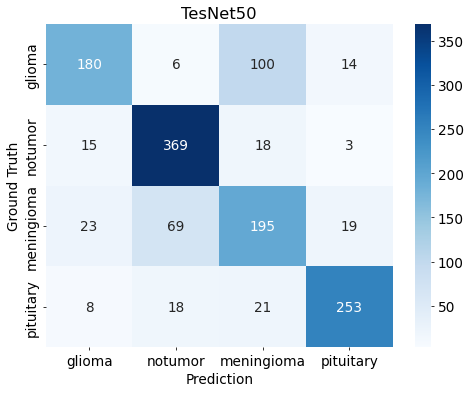

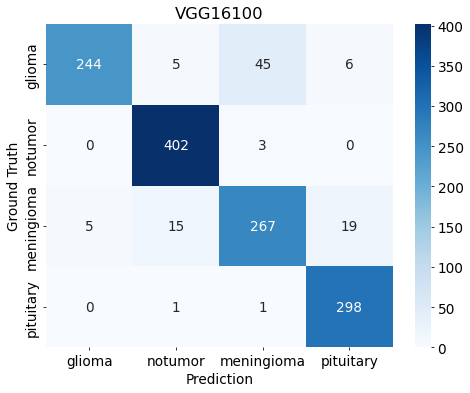

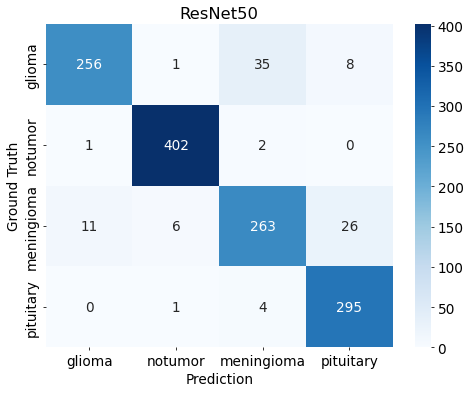

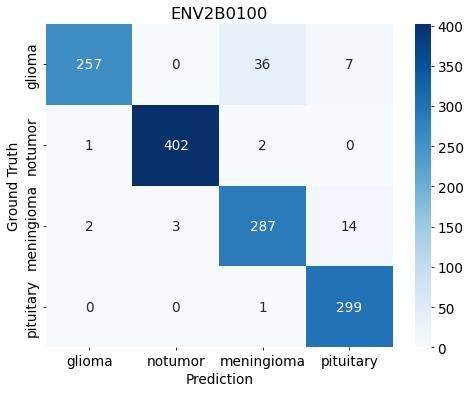

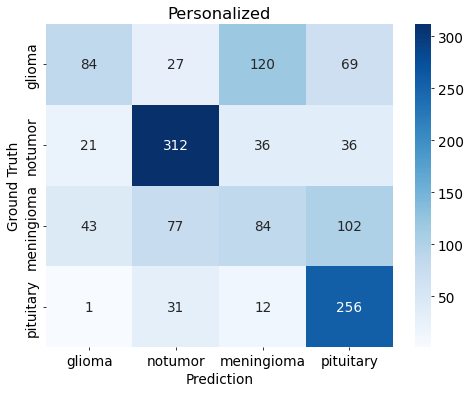

In [ ]:
cnf = confusion_matrix(y_true, y_pred1)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('TesNet50')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)
cnf = confusion_matrix(y_true, y_pred2)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('VGG16100')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)
cnf = confusion_matrix(y_true, y_pred3)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('ResNet50')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)
cnf = confusion_matrix(y_true, y_pred4)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('ENV2B0100')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)
cnf = confusion_matrix(y_true, y_pred5)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('Personalized')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

In [ ]:
print('TesNet50' + classification_report(y_true, y_pred1))
print('-------------------------------------------------------------------------')
print('VGG16100' + classification_report(y_true, y_pred2))
print('-------------------------------------------------------------------------')
print('ResNet50' + classification_report(y_true, y_pred3))
print('-------------------------------------------------------------------------')
print('ENV2B' + classification_report(y_true, y_pred4))
print('-------------------------------------------------------------------------')
print('Personalized' + classification_report(y_true, y_pred5))
print('--------------------------------------------------')

TesNet50              precision    recall  f1-score   support

           0       0.80      0.60      0.68       300
           1       0.80      0.91      0.85       405
           2       0.58      0.64      0.61       306
           3       0.88      0.84      0.86       300

    accuracy                           0.76      1311
   macro avg       0.76      0.75      0.75      1311
weighted avg       0.77      0.76      0.76      1311

-------------------------------------------------------------------------
VGG16100              precision    recall  f1-score   support

           0       0.98      0.81      0.89       300
           1       0.95      0.99      0.97       405
           2       0.84      0.87      0.86       306
           3       0.92      0.99      0.96       300

    accuracy                           0.92      1311
   macro avg       0.92      0.92      0.92      1311
weighted avg       0.93      0.92      0.92      1311

----------------------------------------

In [ ]:
# Columnas de la tabla
t = PrettyTable(['Model', 'Accuracy', 'glioma','meningioma', 'notumor', 'pituitary'])
# To insert rows:
t.add_row(['TesNet50', 0.77,0.80,0.80,0.58,0.88])
t.add_row(['VGG16100', 0.93,0.98,0.95,0.84,0.92 ])
t.add_row(['ResNet50', 0.93,0.96,0.98,0.87,0.90])
t.add_row(['ENV2B', 0.95,0.99,0.99,0.88,0.93])
t.add_row(['Personalized', 0.55,0.56,0.70,0.33,0.55 ])
print(t)


+--------------+----------+--------+------------+---------+-----------+
|    Model     | Accuracy | glioma | meningioma | notumor | pituitary |
+--------------+----------+--------+------------+---------+-----------+
|   TesNet50   |   0.77   |  0.8   |    0.8     |   0.58  |    0.88   |
|   VGG16100   |   0.93   |  0.98  |    0.95    |   0.84  |    0.92   |
|   ResNet50   |   0.93   |  0.96  |    0.98    |   0.87  |    0.9    |
|    ENV2B     |   0.95   |  0.99  |    0.99    |   0.88  |    0.93   |
| Personalized |   0.55   |  0.56  |    0.7     |   0.33  |    0.55   |
+--------------+----------+--------+------------+---------+-----------+
